# Przebieg nauki
---
Większość kodu pochodzi z https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.3-using-a-pretrained-convnet.ipynb
---
Zmodyfikowałem go aby można było korzystać z większej ilości klas.
___

In [1]:
import keras
from keras.applications import VGG16
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from keras.utils.np_utils import to_categorical
import math
import cv2
import matplotlib.pyplot as plt
%matplotlib inline  

top_model_weights_path = 'vggg.h5'

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

conv_base.summary()

train_dir = './data/train'
validation_dir = './data/validation'

nTrain = 30000
nVal = 8070

Using TensorFlow backend.


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
block1_conv1 (Convolution2D)     (None, 224, 224, 64)  1792        input_1[0][0]                    
____________________________________________________________________________________________________
block1_conv2 (Convolution2D)     (None, 224, 224, 64)  36928       block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_pool (MaxPooling2D)       (None, 112, 112, 64)  0           block1_conv2[0][0]               
___________________________________________________________________________________________

In [2]:
datagen = ImageDataGenerator(rescale=1. / 255)
batch_size = 20

train_features = np.zeros(shape=(nTrain, 7, 7, 512))
train_labels = np.zeros(shape=(nTrain, 3))

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)


i = 0
for inputs_batch, labels_batch in train_generator:
    features_batch = conv_base.predict(inputs_batch)
    train_features[i * batch_size: (i + 1) * batch_size] = features_batch
    train_labels[i * batch_size: (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= nTrain:
        break

train_features = np.reshape(train_features, (nTrain, 7 * 7 * 512))

print("dane treningowe zapisane")

Found 30000 images belonging to 3 classes.
dane treningowe zapisane


In [4]:
validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)


validation_features = np.zeros(shape=(nVal, 7, 7, 512))
validation_labels = np.zeros(shape=(nVal, 3))

i = 0
for inputs_batch, labels_batch in validation_generator:
    features_batch = conv_base.predict(inputs_batch)
    validation_features[i * batch_size: (i + 1) * batch_size] = features_batch
    validation_labels[i * batch_size: (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= nVal:
        break

validation_features = np.reshape(validation_features, (nVal, 7 * 7 * 512))

print("dane walidacyjne zapisane")

Found 8070 images belonging to 3 classes.
dane walidacyjne zapisane


In [6]:
import keras
print(keras.__version__)

1.2.1


In [7]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=7 * 7 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features,
                    train_labels,
                    nb_epoch=20,
                    batch_size=batch_size,
                    validation_data=(validation_features, validation_labels))


model.save_weights(top_model_weights_path)

Train on 30000 samples, validate on 8070 samples
Epoch 1/20
30000/30000 [==============================] - 20s - loss: 0.2907 - acc: 0.8836 - val_loss: 0.1581 - val_acc: 0.9400
Epoch 2/20
30000/30000 [==============================] - 20s - loss: 0.1791 - acc: 0.9314 - val_loss: 0.1439 - val_acc: 0.9477
Epoch 3/20
30000/30000 [==============================] - 20s - loss: 0.1555 - acc: 0.9413 - val_loss: 0.1374 - val_acc: 0.9471
Epoch 4/20
30000/30000 [==============================] - 20s - loss: 0.1356 - acc: 0.9490 - val_loss: 0.1466 - val_acc: 0.9461
Epoch 5/20
30000/30000 [==============================] - 20s - loss: 0.1290 - acc: 0.9528 - val_loss: 0.1358 - val_acc: 0.9508
Epoch 6/20
30000/30000 [==============================] - 20s - loss: 0.1187 - acc: 0.9577 - val_loss: 0.1660 - val_acc: 0.9392
Epoch 7/20
30000/30000 [==============================] - 20s - loss: 0.1103 - acc: 0.9610 - val_loss: 0.1354 - val_acc: 0.9538
Epoch 8/20
30000/30000 [==============================]

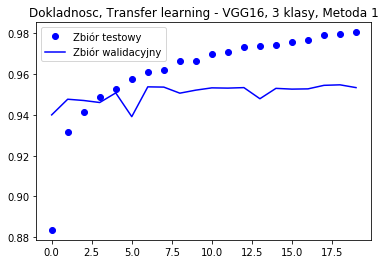

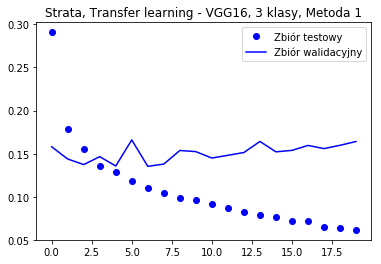

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Zbiór treningowy')
plt.plot(epochs, val_acc, 'b', label='Zbiór walidacyjny')
plt.title('Dokladnosc, Transfer learning - VGG16, 3 klasy, Metoda 1')
plt.legend()

p1 = plt.figure()

plt.plot(epochs, loss, 'bo', label='Zbiór treningowy')
plt.plot(epochs, val_loss, 'b', label='Zbiór walidacyjny')
plt.title('Strata, Transfer learning - VGG16, 3 klasy, Metoda 1')
plt.legend()

plt.show()

In [10]:
plt.savefig('foo.png')

In [13]:
p1.savefig("dd.png")

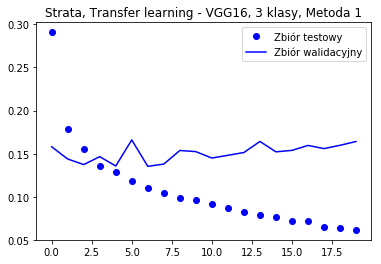

In [14]:
plt.plot(epochs, loss, 'bo', label='Zbiór testowy')
plt.plot(epochs, val_loss, 'b', label='Zbiór walidacyjny')
plt.title('Strata, Transfer learning - VGG16, 3 klasy, Metoda 1')
plt.legend()
p2 = plt.figure()
plt.show()

In [15]:
p2.savefig("dd1.png")

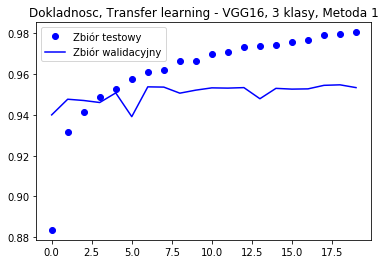

In [27]:
plt.plot(epochs, acc, 'bo', label='Zbiór testowy')
plt.plot(epochs, val_acc, 'b', label='Zbiór walidacyjny')
plt.title('Dokladnosc, Transfer learning - VGG16, 3 klasy, Metoda 1')
plt.legend()

p3 = plt.figure()
p3.savefig("dd10.png")
plt.show(block=False)

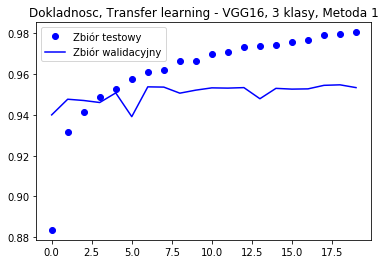

In [28]:
plt.plot(epochs, acc, 'bo', label='Zbiór testowy')
plt.plot(epochs, val_acc, 'b', label='Zbiór walidacyjny')
plt.title('Dokladnosc, Transfer learning - VGG16, 3 klasy, Metoda 1')
plt.legend()

p3 = plt.figure()
p3.savefig("dd11.png")
plt.show(block=False)

In [29]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [30]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
vgg16 (Model)                    (None, 7, 7, 512)     14714688                                     
____________________________________________________________________________________________________
flatten_1 (Flatten)              (None, 25088)         0           block5_pool[0][0]                
____________________________________________________________________________________________________
dense_5 (Dense)                  (None, 256)           6422784     flatten_1[0][0]                  
____________________________________________________________________________________________________
dense_6 (Dense)                  (None, 3)             771         dense_5[0][0]                    
Total params: 21,138,243
Trainable params: 21,138,243
Non-trainable params: 0
_____________

In [31]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [32]:
conv_base.trainable = False

In [33]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [34]:

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])


Found 30000 images belonging to 3 classes.
Found 8070 images belonging to 3 classes.


In [42]:
history = model.fit_generator(
      train_generator,
      samples_per_epoch=(nTrain//20),
      nb_epoch=30,
      validation_data=validation_generator,
      nb_val_samples=(nVal//20))

Epoch 1/30
1500/1500 [==============================] - 107s - loss: 0.2460 - acc: 0.9033 - val_loss: 0.1123 - val_acc: 0.9571
Epoch 2/30
1500/1500 [==============================] - 107s - loss: 0.2143 - acc: 0.9173 - val_loss: 0.1348 - val_acc: 0.9452
Epoch 3/30
1500/1500 [==============================] - 107s - loss: 0.1915 - acc: 0.9273 - val_loss: 0.0685 - val_acc: 0.9786
Epoch 4/30
1500/1500 [==============================] - 107s - loss: 0.1803 - acc: 0.9327 - val_loss: 0.0682 - val_acc: 0.9714
Epoch 5/30
1500/1500 [==============================] - 107s - loss: 0.1409 - acc: 0.9453 - val_loss: 0.0875 - val_acc: 0.9595
Epoch 6/30
1500/1500 [==============================] - 106s - loss: 0.1789 - acc: 0.9293 - val_loss: 0.0570 - val_acc: 0.9805
Epoch 7/30
1500/1500 [==============================] - 107s - loss: 0.1253 - acc: 0.9520 - val_loss: 0.3575 - val_acc: 0.8810
Epoch 8/30
1500/1500 [==============================] - 107s - loss: 0.1428 - acc: 0.9547 - val_loss: 0.0679 - 

In [43]:
model.save_weights('vgg2w.h5')
model.save('vgg2.h5')

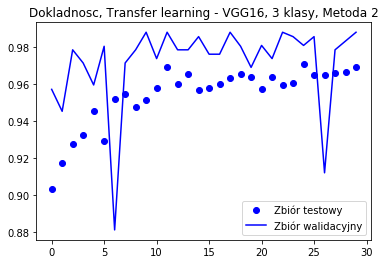

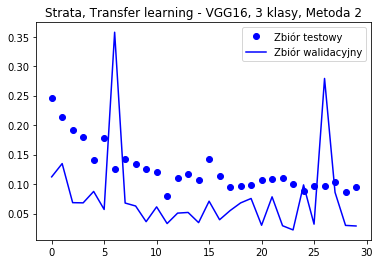

In [44]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Zbiór treningowy')
plt.plot(epochs, val_acc, 'b', label='Zbiór walidacyjny')
plt.title('Dokladnosc, Transfer learning - VGG16, 3 klasy, Metoda 2')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Zbiór treningowy')
plt.plot(epochs, val_loss, 'b', label='Zbiór walidacyjny')
plt.title('Strata, Transfer learning - VGG16, 3 klasy, Metoda 2')
plt.legend()

plt.show()

In [45]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [47]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      samples_per_epoch=(nTrain//20),
      nb_epoch=60,
      validation_data=validation_generator,
      nb_val_samples=(nVal//20))

Epoch 1/60
1500/1500 [==============================] - 47s - loss: 0.0527 - acc: 0.9827 - val_loss: 0.0282 - val_acc: 0.9905
Epoch 2/60
1500/1500 [==============================] - 46s - loss: 0.0575 - acc: 0.9807 - val_loss: 0.0498 - val_acc: 0.9780
Epoch 3/60
1500/1500 [==============================] - 46s - loss: 0.0653 - acc: 0.9807 - val_loss: 0.0432 - val_acc: 0.9905
Epoch 4/60
1500/1500 [==============================] - 46s - loss: 0.0660 - acc: 0.9813 - val_loss: 0.0239 - val_acc: 0.9881
Epoch 5/60
1500/1500 [==============================] - 46s - loss: 0.0641 - acc: 0.9827 - val_loss: 0.0334 - val_acc: 0.9905
Epoch 6/60
1500/1500 [==============================] - 46s - loss: 0.0590 - acc: 0.9753 - val_loss: 0.0214 - val_acc: 0.9881
Epoch 7/60
1500/1500 [==============================] - 46s - loss: 0.0655 - acc: 0.9760 - val_loss: 0.0737 - val_acc: 0.9810
Epoch 8/60
1500/1500 [==============================] - 46s - loss: 0.0688 - acc: 0.9740 - val_loss: 0.0084 - val_acc:

In [48]:
model.save_weights('vgg2fw.h5')
model.save('vgg2f.h5')

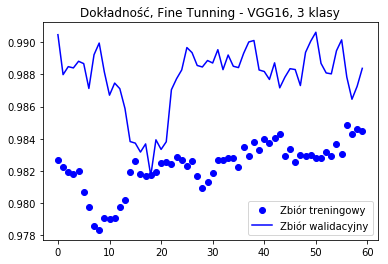

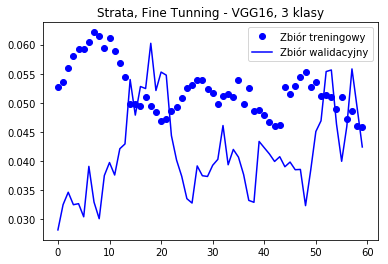

In [53]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

def smooth_curve (points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Zbiór treningowy')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Zbiór walidacyjny')
plt.title('Dokładność, Fine Tunning - VGG16, 3 klasy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Zbiór treningowy')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Zbiór walidacyjny')
plt.title('Strata, Fine Tunning - VGG16, 3 klasy')
plt.legend()

plt.show()